In [1]:
pip install  tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Basic Libraries 📚

import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [3]:
# Basic Modules & Useful Installations

import warnings
warnings.simplefilter(action='ignore')
from geopy.distance import geodesic

In [4]:
# Geo Libraries 📚

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [5]:
# Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor #This give several diferent options
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture

In [6]:
# Neural Networks

import tensorflow as tf
from tensorflow import keras

In [7]:
# Completed Caracterization 🔧 

def data_caracterization(df):
    
    columns = df.columns.tolist()
    (dfrows,dfcolumns) = df.shape
    df.reset_index()
    print(f'Caracterization:\n')
    print(f'Number of Rows: {dfrows}\n')
    print(f'Number of Columns: {dfcolumns}\n')
    print(f'Columns Names/Variables/Features: {columns}\n')
    df.info()
    print(f'\n Head:\n')
    
    return df.head(5)

In [8]:
# Construct Wild distance

def calculate_distance_row(row):
    
    coordinates_1 = (row['lat_buf'], row['long_buf'])
    coordinates_2 = (row['latitude'], row['longitude'])
    
    return geodesic(coordinates_1, coordinates_2).kilometers

In [9]:
# Construct reading relative path
relative_path = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/campsites_chars.csv"

# Change directory
os.chdir('C:\\Users\\Oscar\\Documents\\00_Ironhack\\P3_Final\\') #Change for your own directory

# Check directory
current_directory = os.getcwd()
print("Current working directory is:", current_directory)

Current working directory is: C:\Users\Oscar\Documents\00_Ironhack\P3_Final


In [10]:
# Construct absolute paths

campsites_path = os.path.join(current_directory, relative_path)

In [11]:
# Campsites reading

if os.path.exists(campsites_path):
    try:
        # Try to read the CSV file
        data = pd.read_csv(campsites_path)
        print("The file has been loaded successfully.")
        # Now you can work with the 'data' DataFrame
    except Exception as e:
        print("An error occurred while reading the file:", e)
else:
    print("The file does not exist at the specified path:", campsites_path)

The file has been loaded successfully.


In [12]:
# Dataframe Creation

dfca = data.copy()


In [13]:
data_caracterization(dfca)

Caracterization:

Number of Rows: 3575

Number of Columns: 15

Columns Names/Variables/Features: ['name', 'address', 'city', 'website', 'schedule', 'longitude', 'latitude', 'distance_km', 'type', 'luxury', 'beach', 'wild', 'rating', 'long_buf', 'lat_buf']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         3575 non-null   object 
 1   address      3575 non-null   object 
 2   city         3575 non-null   object 
 3   website      3575 non-null   object 
 4   schedule     3575 non-null   object 
 5   longitude    3575 non-null   float64
 6   latitude     3575 non-null   float64
 7   distance_km  3575 non-null   float64
 8   type         3359 non-null   object 
 9   luxury       3575 non-null   object 
 10  beach        3575 non-null   int64  
 11  wild         3575 non-null   int64  
 12  rating       3575 non-null   float64
 13  l

,name,address,city,website,schedule,longitude,latitude,distance_km,type,luxury,beach,wild,rating,long_buf,lat_buf
0,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,Madrid,http://www.campingosuna.com/,Monday: 8:00 AM – 11:30 PM Tuesday: 8:00 AM – ...,-3.603361,40.453734,9.458117,City,Campsite,0,0,3.9,-3.703790,40.416775
1,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,Alcalá de Henares,http://www.campingosuna.com/,Monday: 8:00 AM – 11:30 PM Tuesday: 8:00 AM – ...,-3.603361,40.453734,20.181317,Town,Campsite,0,0,3.9,-3.368802,40.484390
2,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,Fuenlabrada,http://www.campingosuna.com/,Monday: 8:00 AM – 11:30 PM Tuesday: 8:00 AM – ...,-3.603361,40.453734,24.875383,Town,Campsite,0,0,3.9,-3.803548,40.290206
3,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,Torrejón de Ardoz,http://www.campingosuna.com/,Monday: 8:00 AM – 11:30 PM Tuesday: 8:00 AM – ...,-3.603361,40.453734,10.851165,Town,Campsite,0,0,3.9,-3.475497,40.456755
4,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,Parla,http://www.campingosuna.com/,Monday: 8:00 AM – 11:30 PM Tuesday: 8:00 AM – ...,-3.603361,40.453734,28.066198,Town,Campsite,0,0,3.9,-3.773987,40.237306


## ENCODING

In [15]:
# Encoding categoricals. We are going to use manual encoding because we need it for the model after.

type = {
    'City': 0,
    'Town': 1,
    'Village': 2,
}


luxury = {
    'Campsite': 0,
    'Glamping': 1,
    'Camper': 2
}


# Now let's do the mapping

dfca['type'] = dfca['type'].map(type)
dfca['luxury'] = dfca['luxury'].map(luxury)

In [16]:
encoding_column = ["type", "luxury", "beach", "wild", "rating", "long_buf", "lat_buf"] 

dfcoding = dfca[encoding_column]

## SETTING TARGET (Y)

In [18]:
# For Neural Networks and  MultiOutPut Lineal Regresions

y_columns = ["long_buf", "lat_buf"]

X = dfcoding.drop( y_columns, axis = 1)

y = dfcoding[y_columns]

## NEURAL NETWORK WITH TENSOR FLOW

In [20]:

y_columns = ["long_buf", "lat_buf"]

X = dfcoding.drop( y_columns, axis = 1)

y = dfcoding[y_columns]

In [21]:
# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Define your features

features = ['type', 'luxury', 'beach', 'wild', 'rating']

# Convert pandas DataFrames to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train[features].values, y_train[['long_buf', 'lat_buf']].values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test[features].values, y_test[['long_buf', 'lat_buf']].values))

# Shuffle and batch the datasets
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Define your neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(features),)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2)  # Output layer with 2 units for latitude and longitude
])

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer ='adamax', loss ='mse')

# Train the model

model.fit(train_dataset, epochs = 100)

# Evaluate the model

loss = model.evaluate(test_dataset)

# Make predictions

predictions = model.predict(test_dataset)


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - loss: 990.0408 
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 985.5820
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 943.2938
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 912.0956
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 868.5843
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 823.5269
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 762.6718
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 699.0421
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 632.0551
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 548.8204
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 456.8084
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 385.3450
Epoch 13/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 317.3042
Epoch 14/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 242.6086
Epoch 15/100
9

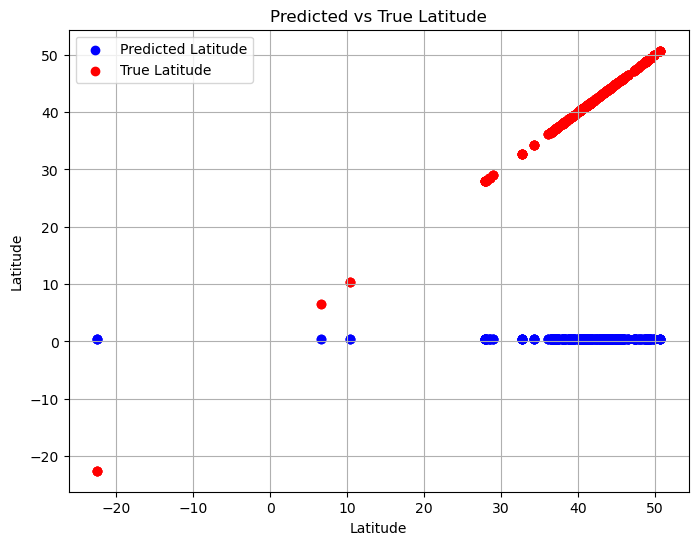

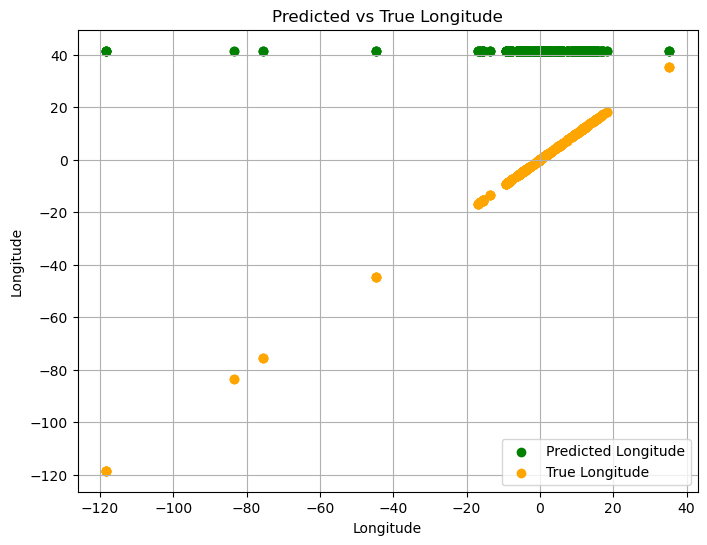

In [23]:
# Extract predicted latitude and longitude
predicted_latitude = predictions[:, 0]
predicted_longitude = predictions[:, 1]

# Extract true latitude and longitude
true_latitude = y_test["lat_buf"]
true_longitude = y_test["long_buf"]

# Plot predicted vs true latitude
plt.figure(figsize=(8, 6))
plt.scatter(true_latitude, predicted_latitude, color='blue', label='Predicted Latitude')
plt.scatter(true_latitude, true_latitude, color='red', label='True Latitude')
plt.xlabel('Latitude')
plt.ylabel('Latitude')
plt.title('Predicted vs True Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot predicted vs true longitude
plt.figure(figsize=(8, 6))
plt.scatter(true_longitude, predicted_longitude, color='green', label='Predicted Longitude')
plt.scatter(true_longitude, true_longitude, color='orange', label='True Longitude')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.title('Predicted vs True Longitude')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_val, X_test are your pandas DataFrames containing training, validation, and testing data
# X_train, y_train, X_val, y_val, X_test, y_test are your features and target variables split accordingly

# Define your features
features = ['type', 'luxury', 'beach', 'wild', 'rating']

# Define your target variables
target_variables = ['long_buf', 'lat_buf']

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(len(features),)),
    Dense(64, activation='relu'),
    Dense(len(target_variables))  # Output layer with 2 units for latitude and longitude
])

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer='adamax', loss='mse')

# Convert pandas DataFrames to numpy arrays
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Train the model

model.fit(X_train, y_train, epochs=75)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 984.4233 
Epoch 2/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 984.7885
Epoch 3/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 965.3669
Epoch 4/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 924.0720
Epoch 5/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 877.0886
Epoch 6/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 815.4121
Epoch 7/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 785.1071
Epoch 8/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 734.7372
Epoch 9/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 671.9120
Epoch 10/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 604.7327
Epoch 11/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 539.5693
Epoch 12/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 473.6697
Epoch 13/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 411.3896
Epoch 14/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 340.4794
Epoch 15/75
90/90 ━━━━━━━━━━

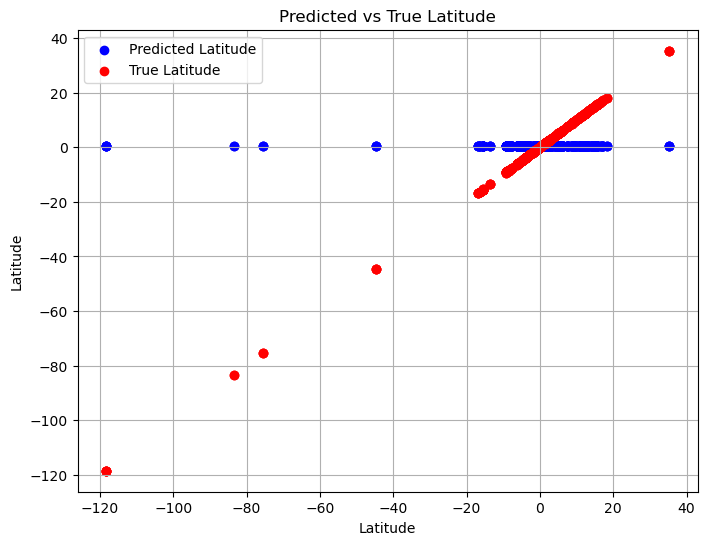

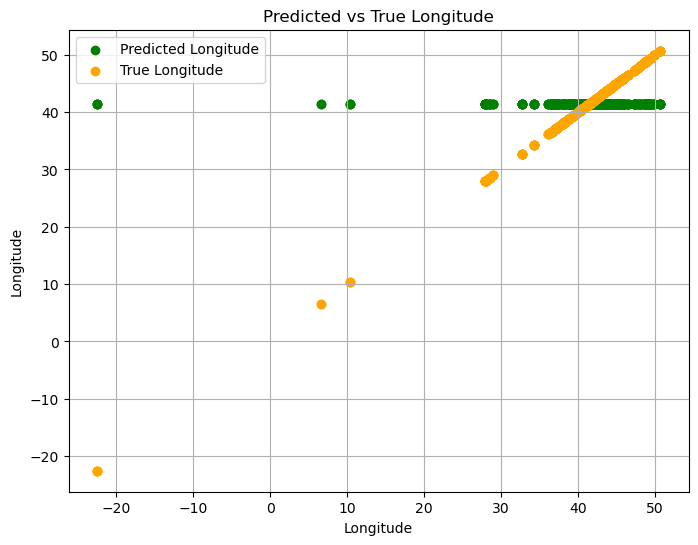

In [25]:
# Extract predicted latitude and longitude
predicted_latitude = predictions[:, 0]
predicted_longitude = predictions[:, 1]

# Extract true latitude and longitude
true_latitude = y_test[:, 0]
true_longitude = y_test[:, 1]

# Plot predicted vs true latitude
plt.figure(figsize=(8, 6))
plt.scatter(true_latitude, predicted_latitude, color='blue', label='Predicted Latitude')
plt.scatter(true_latitude, true_latitude, color='red', label='True Latitude')
plt.xlabel('Latitude')
plt.ylabel('Latitude')
plt.title('Predicted vs True Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot predicted vs true longitude
plt.figure(figsize=(8, 6))
plt.scatter(true_longitude, predicted_longitude, color='green', label='Predicted Longitude')
plt.scatter(true_longitude, true_longitude, color='orange', label='True Longitude')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.title('Predicted vs True Longitude')
plt.legend()
plt.grid(True)
plt.show()